In [13]:
#!pip install scikit-allel

     |████████████████████████████████| 10.8 MB 1.8 MB/s eta 0:00:01
  Created wheel for scikit-allel: filename=scikit_allel-1.3.2-cp37-cp37m-macosx_10_9_x86_64.whl size=1429579 sha256=eaf6cc9567aeea3b01881a5ab44a9fc104bee2548f40eb13895ad3240cf2a523
  Stored in directory: /Users/anushasubramanian/Library/Caches/pip/wheels/4b/d7/9e/0fd296f2b36e26ee923a9a3c056d58c81e070fd02ea7a61231
Successfully built scikit-allel


In [77]:
import allel
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
print(allel.__version__)

1.3.2


# Actual Files 

## PSL2

All unphased

In [23]:
cd

/Users/anushasubramanian


In [24]:
cd Desktop/yeast_parent_vcf

/Users/anushasubramanian/Desktop/yeast_parent_vcf


In [25]:
callset = allel.vcf_to_dataframe('psl5.snp.vcf.gz', fields='*')

In [26]:
callset.head()

,CHROM,POS,ID,REF,ALT_1,ALT_2,ALT_3,QUAL,AMQ_1,AMQ_2,AMQ_3,AMQ_4,FILTER_PASS,numalt,altlen_1,altlen_2,altlen_3,is_snp
0,chrI,101,.,G,A,NaN,NaN,5.0,-1,32,-1,-1,False,1,0,0,0,True
1,chrI,114,.,T,A,NaN,NaN,5.0,27,32,-1,-1,False,1,0,0,0,True
2,chrI,115,.,C,G,NaN,NaN,12.0,32,27,-1,-1,False,1,0,0,0,True
3,chrI,136,.,G,A,NaN,NaN,6.0,32,32,-1,-1,False,1,0,0,0,True
4,chrI,139,.,T,TC,TCC,NaN,12.0,-1,32,32,-1,False,2,1,2,0,False


### Store vcf in DataFrame directly

Chromosome 1 positions are the first 506 elements of this array

In [71]:
callset = allel.read_vcf('psl2.snp.vcf', fields = ['GT'])

In [72]:
chr1gtDF = allel.vcf_to_dataframe('psl2.snp.vcf', fields = ['CHROM', 'POS'])[:507] # chr1 all here

In [73]:
#chr1gt = callset['calldata/GT'][:507]
gt = allel.GenotypeArray(callset['calldata/GT'][:507]).tolist() # just the genotypes

In [74]:
gt[1:4]

[[[0, 1]], [[0, 1]], [[0, 1]]]

In [75]:
## extract the tuple from this
chr1gt = []
for item in gt:
    chr1gt.append(item[0])

In [76]:
chr1gtDF["GT"] = chr1gt
chr1gtDF.head()

,CHROM,POS,GT
0,chrI,59,"[0, 1]"
1,chrI,71,"[0, 1]"
2,chrI,136,"[0, 1]"
3,chrI,141,"[0, 1]"
4,chrI,286,"[0, 1]"


 create a column in the data frame with what it should be for 1, 0 and 0.5

In [94]:
coord = []
count = 0
for elem in chr1gtDF["GT"]:
    if elem == [0,1] or elem == [1,0]:
        coord.append(0.5)
    elif elem == [0,0]:
        count += 1
        coord.append(0)
    elif elem == [1,1]:
        coord.append(1)
chr1gtDF["Ycoord"] = coord

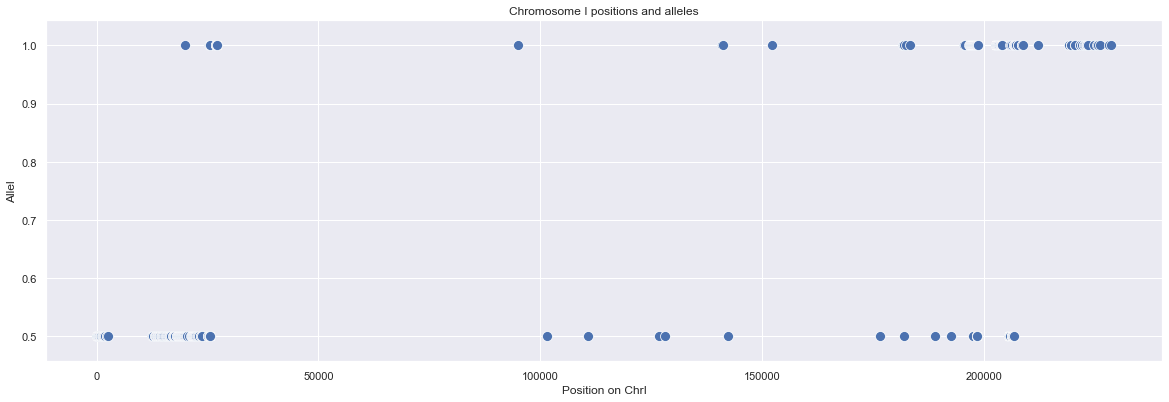

In [103]:
#plot barplot
sns.set(rc={'figure.figsize':(20,6.27)})
chr1Scatter = sns.scatterplot(x = "POS", y = "Ycoord", data = chr1gtDF, s = 100);
chr1Scatter.set(xlabel = "Position on ChrI", ylabel = "Allel", 
                title ="Chromosome I positions and alleles");

#for p in chr1Scatter.patches:
    #chr1Scatter.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
               #ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.savefig('Chromosome I psl2.png', dpi = 180, bbox_inches='tight')